<!-- -Assignment 1 By Hashem Fawzy for Applied Machine Learning

1. Data Description and Analysis
We will be taking a look at a dataset with 4700+ houses with several columns detailing the numbers and existance of bedrooms, floors, and finalizing with the rental price.
 *Note: keep in mind the data is mainly for india, and that it includes the district the home is in, as well as whether the home is a apartment, house, or other form of living.
 
 My motivation to select this dataset was from the usage of this data fullfilling not only the objectives required to construct a model, but also is a great datatset to practice model building and creating a machine dedicated to possibly predict the price of housing based on the factors determined in a house. India is a vast and fluctuating city with alot of information available to those outside of the country, which is why their data will be a great foundation to understanding prices within the city should someone consider living there. While a price will definitely be more if the size is much greater than one other, would one price differ in Mumbai compared to Lucklow with the exact same features? that's what we will try to find out
 
 My Objective with this dataset is to create a model estimating rent based on the factors needed by the individual for their living space. For example, if a person wants a house with a garage, 2 bedrooms, a bath, and of small size, I would like to input the data into the model and come out with a price such as 8000. we will construct several models using different factors and ultimately decide on one
 
 Our approach to completing this area will be to first determine the factors that are important to the dataset, using testing and visualization. Next we will predict and train our data to detect any source of underfitting, overfitting, or more.
    

In [51]:
# Assignment 1 for Machine Learning by Hashem Fawzy.
# Hello guys and welcome to my Jupyter Notebook. we will be looking at a dataset called the House_Rent_Dataset. 
# For a short expanation. this data is on the rental price of housing for several places located in india. India uses the rupee as
# their form of currency, so this is using that mode of currency instead of others. The data also lists several columns with different
# details about the home, such as The city it is located in, whether it is furnished, and more detais listed below.

# My Objective is to visualize the relationships between several factors of the data compared to the rent in order to build a 
# model with at least ample accuracy and create something capable of calculating rent with the factors considered.

# My approach to this will first creating an understanding of important factors to the data using visual comparisons to eachother.
# once analyzed, the factors chosen as important will then be placed into our model, which we will then split our data into
# test/training data. 
# For my Approach I will be utilizing 2 models, the Linear regression model, as well as a decision tree model called the Random 
# Forests model.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Loading the Dataset we will be using
data= pd.read_csv(r'D:\School\University\Semester 6\Applied Machine Learning\House_Rent_Dataset.csv')
#Showing the first 5 rows of our data as a sample.
data.head()

# The Data has several nominal and discrete/continuous Forms of data. we will take a look at the important ones, and consider 
# Which to install in our model later

# Features we will consider when building the model (Based on data found):
# BHK: Number of Bedrooms, Hall, Kitchen.

# Rent: Rent of the Houses/Apartments/Flats - Our Y variable (DEPENDANT)
# Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

# Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
# Area Locality: Locality of the Houses/Apartments/Flats.

# City: City where the Houses/Apartments/Flats are Located.
# Bathroom Number
# Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
# Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
# A description of the Data. Including any mean, median
data.describe()
#What this means. On average, the BHK on average is 2, as well as the size being on average 967, and there being 2 bathrooms 
#on Average. Whats most important is that the RENT is on average 34993. This however will be considred with outliers in the
#Data, which will be shown below in [IN 82]

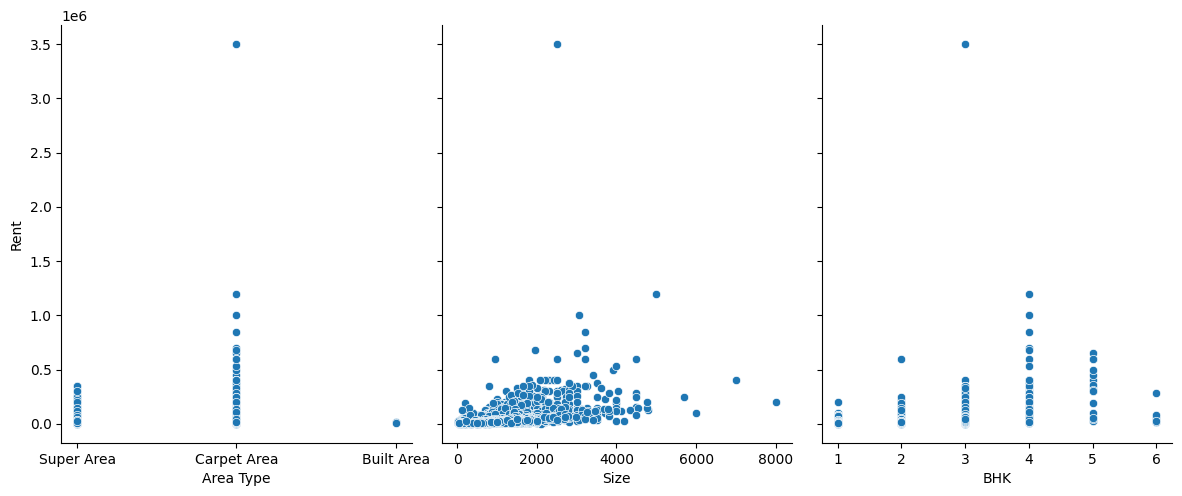

In [54]:
# Visualization using scatterplots
sns.pairplot(data, x_vars=['Area Type','Size','BHK'], y_vars='Rent', height=5, aspect=0.8)

In [ ]:
# #Interesting! while size is showing a high skewness to the right, BHK annd Area Type face a symmetric appearance. For Area Type
# this makes sense, and I will explain more on that with a better visualization form. However, I determine size and BHK to be 
# great for our dataset as they could determine our dataset with their combination, although a few outliers will impact the data.
sns.pairplot(data, x_vars=['Bathroom','Furnishing Status'], y_vars='Rent', height=5, aspect=0.8)

In [ ]:
# The Bathroom Dataset as well as the furnishing status appear to be symmetrical with the rent being shown. As the former has 
# multiple options of choice compared to the latter having only 3, we can analyze our data more fairly, as well as utilizing 
# a discrete dataset. We will use Bathroom for our model.

#Visualizing the Rent based on the city. Included is the number of Rooms (Halls and kitchens included)
sns.barplot(x=data['City'], y=data['Rent'], hue=data['BHK'], errorbar=None)

In [ ]:
#Another Barplot. this time measuring the rent according to the furnishing status. Reports from the figure indicate that rent 
#increases slighty based on the furnishing status, rather than unfurnished. This is great. we can understand Mumbai to be the 
# reason why skewness is high  while places like kolkata are considered low. For now we will consider this off the model however,
# as these are nominal datasets.

In [ ]:
sns.scatterplot(x=data['Size']/1000,y=data['Rent']/100000,hue=data['Furnishing Status'])
plt.show()

In [ ]:
#Barplot indicating Area Type relation and BHK relation. 
sns.barplot(x=data['Area Type'], y=data['Rent'], hue=data['BHK'], errorbar=None)
plt.ylabel("Rent")

In [ ]:
# Features for Area Type: Super Area, Carpet Area, and Built Area
#     #Explanation: In india, 3 areas tend to be for sale. The Carpet area are areas where places tend to be used 
#     #by an individual when renting a apartment room, and not by neighbors. Places like the room itself would fall in that area.
#     #Meanwhile, the super Area is an area used by everyone just as a cafeteria, stairs, lifts, and such.
# What This means is that we know that people in india tend to use their renting mainly for the areas lived in. This makes sense. 
# So we can now discard the Area type as a variable to consider when making a model. as if an area is a carpet area, people 
# tend to spend more on it. we can safely consider those renting the Super Area tend to spend less. 
    

In [ ]:
# 2. Prediction Model. Creating our Model
# So, for our model, we will consider 3 factors to be important when creating it for our Linear regression and Random Forests
# Model: Size, Bathroom Number, and BHK.

In [ ]:
# We will start by making a linear regression model.
#For this model we will need variables that are continuous and/or discrete. Discrete variables will need extra care when handled.
#For this I have decided the size, BHK, and Bathroom# are ample examples.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y=data['Rent']
predictors = ['Size', 'BHK', 'Bathroom']
x=data[predictors]
x.head()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [55]:
#We will now try to build a linear regression model using our trained sets.
linearregression = LinearRegression().fit(X_train, y_train)
predict=linearregression.predict(X_test)
R2=r2_score(y_test,predict)
rmse=mean_squared_error(y_test,predict)



linearregression.fit(X_train, y_train)
print(linearregression.intercept_)
print(linearregression.coef_)

print('Root Mean Squared Error:', round(rmse, 2))
print('R2 Score:', round(R2, 4))
print('mean Found: ', np.mean(data['Rent']))
list(zip(predictors, linearregression.coef_))

-36962.074198022834
[ 2.03751252e+01 -1.04931410e+03  2.73519269e+04]
Root Mean Squared Error: 11758754890.06
R2 Score: 0.1142
mean Found:  34993.45132743363


[('Size', 20.375125221784284),
 ('BHK', -1049.3141033910142),
 ('Bathroom', 27351.926877033075)]

In [ ]:
# Our model has given an Root Mean Error of more than a billion in rent, which 
# means the data is completely off due to outliers and other forms in the data. 
# we will try to normalize it and see if there is any difference.
#Our intercept is also found at -36962.

In [ ]:
#we will use a function that I researched in order to normalize the 3 columns from before. After normalization they will be
#named [column name]_log to be used later. we will plot and show the difference.

from math import log
def transformation(row: pd.core.series.Series, col: str) -> float:
    if row[col] <= 0:
        return 0
    return log(row[col])

trf = ['BHK', 'Bathroom', 'Size']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

fig.suptitle('Normalisation of BHK, Bathroom, and Size')

for ax, column in zip(axes.flatten(), cols_for_trf):
    trans = f'{column}_log'
    data[trans] = data.apply(lambda x: transformation(x, column), axis=1)
    ax.set_title(trans)
    data[trans].hist(ax=ax)

plt.show()

In [56]:
new_predictors = ['Size_log', 'BHK_log', 'Bathroom']
x=data[new_predictors]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
linearregression = LinearRegression().fit(X_train, y_train)
predict=linearregression.predict(X_test)
R2=r2_score(y_test,predict)
rmse=mean_squared_error(y_test,predict)
print('mean: ', np.mean(data['Rent']))


linearregression.fit(X_train, y_train)
print(linearregression.intercept_)
print(linearregression.coef_)

print('Root Mean Squared Error:', round(rmse, 2))
print('R2 Score:', round(R2, 4))

list(zip(new_predictors, linearregression.coef_))

KeyError: "['Size_log', 'BHK_log'] not in index"

In [ ]:
# It appears the error is exactly the same even though normalization has occured, minus the Root Square being increased
# This means that considering all the factors, 
#This means alot of underfitting has occured and we need to prevent that as well as pick a new model.
# Linear Regression is not a good model for this aspect of determining rent, as the variables to consider are not influential 
#enough to train a best fit model. We should try a new model now. 

In [58]:
#3. Model Selection

#We will use a random Forest Model now. This model has a wide use in Regression and
#Classification Data. It is also a decision tree tester
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# Creating parameter grids.
param_grid = {
    'n_estimators': [50, 100, 400, 700]
    , 'max_depth': [None, 3, 5, 7]
    , 'max_features': [1, 2, 3]
    , 'max_samples': [0.25, 0.5, 0.75]
}
#a brief explanation of the parameter grid
#n_estimators: specifies the number of trees in the model
#max_depth: The number of splits each tree should make. doing 3,5,7 should create a form stable with less overfitting/underfitting
#max_features: takes random subsets and creates a split
#max_samples: determines the fraction the original set is given to the tree.
np.random.seed(10)
grid_search_rf = GridSearchCV(
    estimator = rf_model
    , param_grid = param_grid
    , n_jobs = -1 # use all processors
#     , verbose = 2
)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7],
                         'max_features': [1, 2, 3],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [50, 100, 400, 700]})

In [ ]:
#utilizing the best parameters and finding the test score 
best_run_n = list(grid_search_rf.cv_results_['rank_test_score']).index(1)
print('Best parameters:', grid_search_rf.best_params_)
print(grid_search_rf.cv_results_['mean_test_score'][best_run_n])

In [ ]:
# From our results we now have an R Squared value of 42%. Previously we
# had a value of 10%. This means we have improved our test by 30% by using
# a different model. 

In [59]:
predictions = grid_search_rf.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test set RMSE: {rmse:.2f}')

Test set RMSE: 106197.03


In [ ]:
# Predicting using the test led to a value of 100000. This is a value smaller than our linear regression model had for 
# its RMSE but more closer due to proper testing and cross-validation sets.
# # and much more feasible.
# Root Mean Squared Error (For LR): 11758754890.06. 
# This however doesn't quite fit the data well as the average rent is 35000 (See IN[82])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(param_grid.estimators_[0], 
          feature_names=trf.feature_names,
          class_names=trf.target_names, 
          filled=True, impurity=True, 
          rounded=True)

In [ ]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(grid_search_rf_[0], X, y,
               feature_names=house.feature_names,
               title="1st decision tree - House data")

In [ ]:
#CONCLUSION

# To conclude my investigation with the dataset using the model I have created, I realize that the factors I considered when
# creating the model has led me to believe that the city tends to be the leading cause to rental pricing. 
# At first I believed the space provided would be the sole cause of why rent could be high or low, but in actuality, it may be 
# because people tend to do their business in a particular city more which is why places that are far away from it 
# (Or have no malls or supermarkets nearby it) would require less rent. Next time the other factors should be considered to further
# increase the accuracy

#For our model selection, I conclude that a best fit model would not occur  from a linear regression model. an increase 
# of more than 30 Percent occured from utilizing a different model. In addition, due to outliers and lack of nominal data we had
#been led to a non-perfect model. 
#Next time I hope to create a model capable of utilizing less underfitting while avoiding noise in the form of too accurate models.


#Thank You.